In [10]:
import math
def media(mat):
    med, n = [], len(mat)
    for i in range(len(mat[0])):
        s = 0
        for j in range(n):
            s += mat[j][i]
        med.append(s / n)
    return med
    
def moda(mat):
    mod, n = [], len(mat)
    for i in range(len(mat[0])):
        s = 0
        occ = {}
        for j in range(n):
            occ[mat[j][i]] = occ.get(mat[j][i], 0) + 1
        most_frequent = max(occ.values())
        mod.append([key for key, value in occ.items() if value == most_frequent] )
#         print(occ)
    return mod
    
def desviacion_estandar(mat):
    d_s, n = [], len(mat)
    mod = media(mat)
    for i in range(len(mat[0])):
        s = 0
        for j in range(n):
            s += (mat[j][i] - mod[i])*(mat[j][i] - mod[i])
        d_s.append(math.sqrt(s / n ))
    return d_s
    

# DataSet Netflix

In [2]:
import pandas as pd

df = pd.read_csv("Netflix_Dataset_Rating.csv")

df.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [3]:
matriz = df.to_numpy()

# Calculo de Media, Moda y Desviacion Estandar

# Media Netflix 

Nuestro algoritmo de la media calcula por cada atributo su media, en las columnas USER_ID, Rating y Movie_ID

In [4]:
media(matriz)

[1321036.2069589682, 3.637543332618077, 173.6546904131798]

### Hallar media con Pandas

In [5]:
df.mean()

User_ID     1.321036e+06
Rating      3.637543e+00
Movie_ID    1.736547e+02
dtype: float64

### Hallar media con Numpy

In [8]:
np.mean(matriz, axis=0)

array([1.32103621e+06, 3.63754333e+00, 1.73654690e+02])

# Moda Netflix 

Nuestro algoritmo retorna un array con la moda calculada por cada atributo, en las columnas USER_ID, Rating y Movie_ID

In [11]:
mod = moda(matriz)

print('User_ID\tRating\tMovie_ID')
for i in range(len(mod)):
    print(mod[i][0], end = '\t')

User_ID	Rating	Movie_ID
305344	4	30	

### Hallar Moda con Pandas

In [12]:
df.mode(axis = 0)

,User_ID,Rating,Movie_ID
0,305344,4,30


### Hallar moda con Numpy

In [13]:
from scipy import stats
stats.mode(matriz)

ModeResult(mode=array([[305344,      4,     30]], dtype=int64), count=array([[    91, 369927,  77502]]))

# Desviacion Estandar Netflix 

Nuestro algoritmo retorna un array con la desviacion calculada por cada atributo, en las columnas USER_ID, Rating y Movie_ID

In [15]:
print(desviacion_estandar(matriz))

[764331.3854134891, 1.0550562437520226, 87.9825473147398]


### Hallar Desviacion Estandar con Pandas

In [16]:
df.std()

User_ID     764331.749876
Rating           1.055057
Movie_ID        87.982589
dtype: float64

### Hallar Desviacion Estandar con Numpy

In [17]:
np.std(matriz, axis=0)

array([7.64331385e+05, 1.05505624e+00, 8.79825473e+01])

# <center> Graficos
### Graficamos los datos de la columna Rating

In [18]:
import matplotlib.pyplot as plt
valores_x = df["Rating"].value_counts().index.tolist()
valores_y = df["Rating"].value_counts().tolist()
print(valores_x, valores_y)

[4, 3, 5, 2, 1] [369927, 299718, 239759, 97409, 41762]


### En la grafica se observa como el valor de Rating es el valor que mas se repite, si se compara con la MODA podemos observar que es correcto

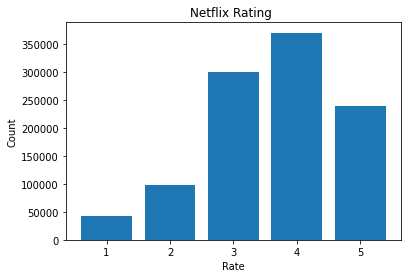

In [19]:
# Moda Rating: 4
plt.bar(valores_x, valores_y)
plt.title("Netflix Rating ")
plt.ylabel('Count')
plt.xlabel('Rate')
plt.show()

In [20]:
valores_x = df["Movie_ID"].value_counts().index.tolist()
valores_y = df["Movie_ID"].value_counts().tolist()

### En la grafica vemos que el valor que mas se repite se encuentra en el intervalo 20- 40, si comparamos con la Moda de la columna Movie_ID vemos que la moda es "30"

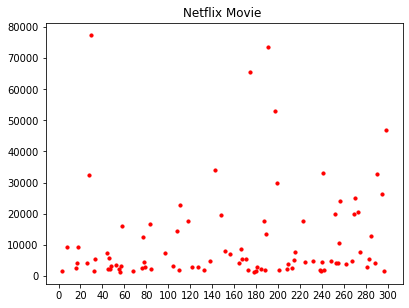

In [22]:
plt.scatter(valores_x, valores_y, 10, 'red')
plt.rcParams["figure.figsize"] = [20,5]
plt.title("Netflix Movie ")
plt.xticks([i for i in range(0, 310, 20)])
plt.show()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]